<a href="https://colab.research.google.com/github/mohd-faizy/CAREER-TRACK-Data-Scientist-with-Python/blob/main/02_Generating_bootstrap_replicates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- 
<strong> 
    <h1 align='center'>Generating bootstrap replicates
</h1> 
</strong>

---

To "pull yourself up by your bootstraps" is a classic idiom meaning that you achieve a difficult task by yourself with no help at all. 

In statistical inference, you want to know what would happen if you could repeat your data acquisition an infinite number of times. This task is impossible, but can we use only the data we actually have to get close to the same result as an infinitude of experiments? The answer is yes! The technique to do it is aptly called **bootstrapping**. 


###__Clone the repository__ 

In [84]:
! git clone https://github.com/mohd-faizy/CAREER-TRACK-Data-Scientist-with-Python.git

Cloning into 'CAREER-TRACK-Data-Scientist-with-Python'...
remote: Enumerating objects: 122, done.
remote: Counting objects: 100% (122/122), done.
remote: Compressing objects: 100% (101/101), done.
remote: Total 1979 (delta 54), reused 72 (delta 20), pack-reused 1857
Receiving objects: 100% (1979/1979), 204.68 MiB | 31.55 MiB/s, done.
Resolving deltas: 100% (706/706), done.
Checking out files: 100% (839/839), done.


### __Change the current working directory__

In [85]:
# import os module 
import os 
   
# to specified path 
os.chdir('/content/CAREER-TRACK-Data-Scientist-with-Python/23_Statistical-Thinking-in-Python-[Part -2]/_datasets') 
  
# varify the path using getcwd() 
cwd = os.getcwd() 
  
# print the current directory 
print("Current working directory is:", cwd)

Current working directory is: /content/CAREER-TRACK-Data-Scientist-with-Python/23_Statistical-Thinking-in-Python-[Part -2]/_datasets


In [86]:
ls

anscombe.csv                              fortis_beak_depth_heredity.csv
bee_sperm.csv                             frog_tongue.csv
CAREER-TRACK-Data-Scientist-with-Python/  mlb_nohitters.csv
female_literacy_fertility.csv             scandens_beak_depth_heredity.csv
finch_beaks_1975.csv                      sheffield_weather_station.csv
finch_beaks_2012.csv


## __Bootstrapping__


__we need to think probabilistically__

<p align='center'>
  <a href="#">
    <img src='https://blogs.sas.com/content/iml/files/2018/12/bootstrapSummary.png'>
  </a>
</p>

>Michelson in the summer of 1879 was **not interested** in what the measured speed of light was in the specific 100 measurements conducted. He wanted to know what the speed of light actually is. Statistically speaking, that means he wanted to know what speed of light he would observe if he did the experiment over and over again an infinite number of times. Unfortunately, actually repeating the experiment lots and lots of times is just not possible. But, as hackers, we can simulate getting the data again.

**Bootstrapping** is a statistical procedure that resamples a single dataset to create many simulated samples. This process allows you to calculate **standard errors**, construct **confidence intervals**, and perform **hypothesis testing** for numerous types of sample statistics.

Bootstrapping is any test or metric ***that uses random sampling with replacement***, and falls under the broader class of resampling methods. Bootstrapping assigns measures of accuracy (**bias, variance, confidence intervals, prediction error**, etc.) to sample estimates.

> **This technique allows estimation of the sampling distribution of almost any statistic using random sampling methods**.

> Bootstrap methods are **alternative approaches** to traditional hypothesis testing. 


__How Bootstrapping Resamples Your Data to Create Simulated Datasets?__

Bootstrapping **resamples** the original dataset with replacement many thousands of times to create **simulated datasets**. This process involves drawing random samples from the original dataset. Here’s how it works:

1. The bootstrap method has an equal probability of randomly drawing each original data point for inclusion in the resampled datasets.

2. The procedure can select a data point more than once for a resampled dataset. This property is the “with replacement” aspect of the process.

3. The procedure creates resampled datasets that are the same size as the original dataset.

Each simulated dataset has its own set of sample statistics, such as the mean, median, and standard deviation. ***Bootstrapping procedures use the distribution of the sample statistics across the simulated samples as the sampling distribution.***

__For Which Sample Statistics Can I Use Bootstrapping?__

Bootstrap method can analyze a broad range of sample statistics and properties. These statistics include:
- Mean
- Median 
- Mode
- Standard Deviation
- Analysis of variance 
- Correlations
- Regression coefficients
- Proportions, odds ratios
- variance in binary data, and
- multivariate statistics 


__Benefits of Bootstrapping over Traditional Statistics__

Bootstrapping ***does not make assumptions about the distribution of your data***. we merely resample our data and use whatever sampling distribution emerges.

Conversely, the traditional methods often ***assume that the data follow the normal distribution*** or some other distribution. For the normal distribution, the central limit theorem might let you bypass this assumption for sample sizes that are larger than ~30. Consequently, you can use bootstrapping for a wider variety of distributions, unknown distributions, and smaller sample sizes. Sample sizes as small as 10 can be usable.

### Getting the terminology down

If we have a data set with  repeated measurements, a bootstrap sample is an array of length $n$ that was drawn from the original data with replacement. What is a bootstrap replicate?

$\color{red}{\textbf{Ans:}}$ A single value of a statistic computed from a bootstrap sample.
press



### Bootstrapping by hand

To help you gain intuition about how bootstrapping works, imagine you have a data set that has only three points, `[-1, 0, 1]`. How many unique bootstrap samples can be drawn (e.g., `[-1, 0, 1]` and `[1, 0, -1]` are unique), and what is the maximum mean you can get from a bootstrap sample? It might be useful to jot down the samples on a piece of paper.

$\color{red}{\textbf{Ans:}}$
There are $27$ total bootstrap samples, and one of them, [1,1,1] has a mean of 1. Conversely, 7 of them have a mean of zero.


### Visualizing bootstrap samples

In this exercise, we will generate bootstrap samples from the set of **annual rainfall** data measured at the Sheffield Weather Station in the UK from 1883 to 2015. The data are stored in the NumPy array rainfall in units of millimeters (mm). **By graphically displaying the bootstrap samples with an ECDF**, ***we can get a feel for how bootstrap sampling allows probabilistic descriptions of data***.

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Read a table of **fixed-width formatted**(`pd.read_fwf()`) lines into DataFrame.

In [88]:
# reading the sheffield weather station data into pandas
df_rainfall = pd.read_fwf('sheffield_weather_station.csv', skiprows=8)
print(df_rainfall.shape)
df_rainfall.head()

(1602, 7)


,yyyy,mm,tmax,tmin,af,rain,sun
0,1883,1,6.3,1.7,6,122.1,---
1,1883,2,8.0,2.8,2,69.8,---
2,1883,3,4.8,-1.6,23,29.6,---
3,1883,4,12.2,3.8,2,74.0,---
4,1883,5,14.7,6.2,0,31.2,---


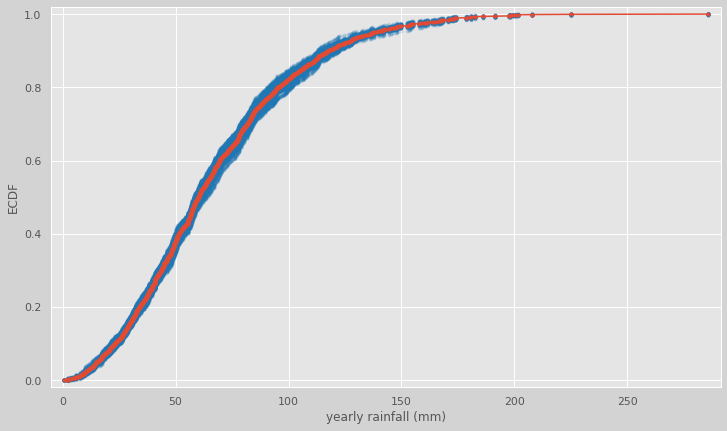

In [89]:
plt.style.use('ggplot')
plt.figure(figsize=(12, 7), facecolor='lightgray')

def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

rainfall = np.array(df_rainfall['rain'])

# Bootstrap samples give an idea of how the distribution of rainfalls is spread
for _ in range(50):
    # Generate bootstrap sample: bs_sample
    bs_sample = np.random.choice(rainfall, size=len(rainfall))

    # Compute and plot ECDF from bootstrap sample
    x, y = ecdf(bs_sample)
    _ = plt.plot(x, y, marker='.', linestyle='none',
                 color='tab:blue', alpha=0.1)


# Compute and plot ECDF from original data
x, y = ecdf(rainfall)
_ = plt.plot(x, y, marker='.')

# Make margins and label axes
plt.margins(0.02)
_ = plt.xlabel('yearly rainfall (mm)')
_ = plt.ylabel('ECDF')

# Show the plot
plt.show()

## __Bootstrap confidence intervals__

### Generating many bootstrap replicates

**Function: `bootstrap_replicate_1d()`** 

```python
def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1D data."""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)
```
**Function: `draw_bs_reps(data, func, size=1)`**

```python
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates
```
This will generates many bootstrap replicates from the data set. we will use this function is use **compute confidence intervals** and later when you do hypothesis tests.


__Instructions__

- Define a function with call signature `draw_bs_reps(data, func, size=1)`.

    - Using `np.empty()`, initialize an array called `bs_replicates` of size to hold all of the **bootstrap replicates**.

    - Write a `for` loop that ranges over `size` and computes a replicate using `bootstrap_replicate_1d()`. Refer to the exercise description above to see the function signature of `bootstrap_replicate_1d()`. Store the replicate in the appropriate index of `bs_replicates`.

    - Return the array of replicates `bs_replicates`. This has already been done for you.

In [90]:
def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1D data."""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

In [91]:
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

### Bootstrap replicates of the mean and the SEM

In this exercise, we will compute a **bootstrap estimate of the probability density function** of the mean annual rainfall at the Sheffield Weather Station. Remember, we are estimating the mean annual rainfall we would get if the Sheffield Weather Station could repeat all of the measurements from 1883 to 2015 over and over again. This is a probabilistic estimate of the mean. You will plot the PDF as a histogram, and you will see that it is Normal.

In fact, it can be shown theoretically that under not-too-restrictive conditions, the value of the **mean** will always be **Normally distributed**. (This does not hold in general, just for the mean and a few other statistics.) The standard deviation of this distribution, called the __Standard Error of the Mean__, or **SEM**, is given by the standard deviation of the data divided by the square root of the number of data points. 
I.e., for a data set, 

```python
sem = np.std(data) / np.sqrt(len(data))
```

Using __hacker statistics__, we can get this same result without the need to derive it, but you will verify this result from your bootstrap replicates.


0.9488593574676786
0.9570723460585422


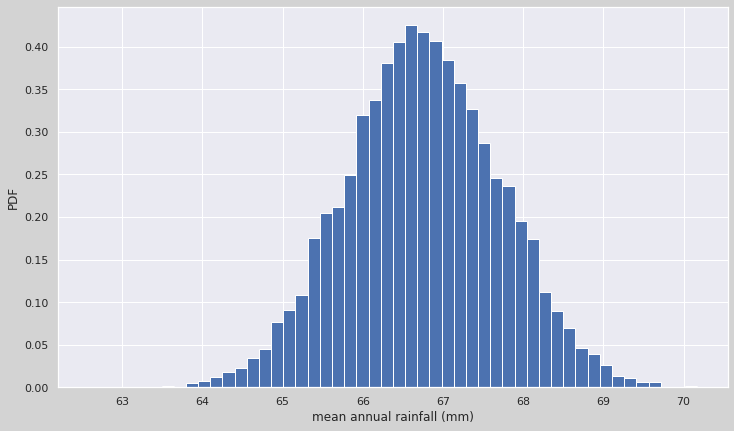

In [92]:
sns.set()
plt.figure(figsize=(12, 7), facecolor='lightgray')

# Using: draw_bs_reps(data, func, size=1)
# Take 10,000 bootstrap replicates of the mean: bs_replicates
bs_replicates = draw_bs_reps(rainfall, np.mean, size=10000)

# Compute and print Standard Error of the Mean(SEM)
sem = np.std(rainfall) / np.sqrt(len(rainfall))
print(sem)

# Compute and print standard deviation of bootstrap replicates
bs_std = np.std(bs_replicates)
print(bs_std)

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=50, density=True)
_ = plt.xlabel('mean annual rainfall (mm)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

$\color{red}{\textbf{ Notice}}$

__That the SEM we got from the known expression and the bootstrap replicates is the same and the distribution of the bootstrap replicates of the mean is Normal.__

### Confidence intervals of rainfall data

A ***confidence interval*** gives **upper** and **lower bounds** on the range of parameter values we might expect to get if we repeat our measurements.

If we repeated measurements over and over again, `p%` of the
observed values would lie within the `p%` confidence interval.

For named distributions, we can compute them analytically or look them up, but one of the many beautiful properties of the bootstrap method is that we can take percentiles of your bootstrap replicates to get your confidence interval. Conveniently, you can use the __`np.percentile()`__ function.

Use the bootstrap replicates you just generated to compute the 95% confidence interval. That is, give the 2.5th and 97.5th percentile of your bootstrap replicates stored as **`bs_replicates`**. What is the 95% confidence interval?

$\color{red}{\textbf{Answer:}}$ __(780, 821) mm/year__

In [93]:
conf_int = np.percentile(bs_replicates, [2.5,97.5])
conf_int

array([64.89728933, 68.61829432])

__Plot rainfall data bootstrapped samples mean and standard deviation as well as there 95% confidence intervals__

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


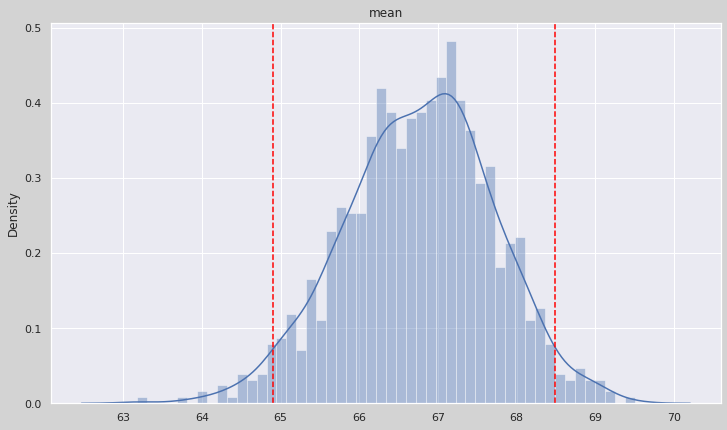


Mean confidence interval [64.90313358 68.49046348]


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


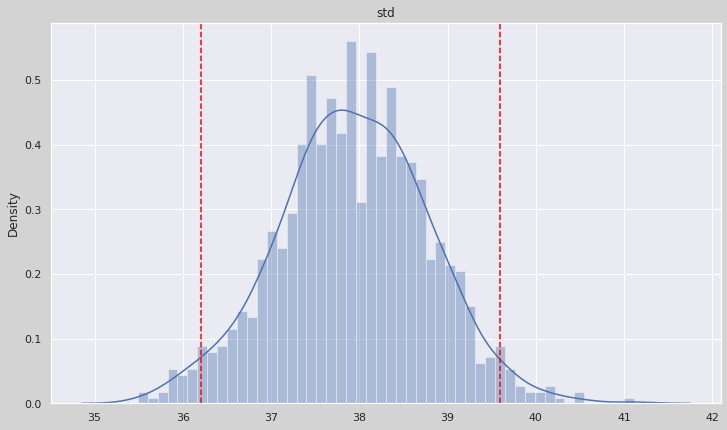


Standard deviation confidence interval [36.20293985 39.59550563]


In [94]:
rainfall = np.array(df_rainfall['rain'])

# construct the simulated sampling distribution
sample_props = []
sample_props0 = []

for _ in range(1000):
    sample = np.random.choice(rainfall, size=len(rainfall))
    sample_props.append(sample.mean())
    sample_props0.append(sample.std())

# Fig size
plt.figure(figsize=(12, 7), facecolor='lightgray')
# Plot the simulated sampling distribution(mean)
sns.distplot(sample_props, bins=50)

# Compute the 95% confidence interval: conf_int
conf_int = np.percentile(sample_props, [2.5,97.5])


# Plot the confidence intervals
plt.axvline(conf_int[0], color='red', linestyle='dashed')
plt.axvline(conf_int[1], color='red', linestyle='dashed')
plt.title('mean')
plt.show()

print('\nMean confidence interval',conf_int)

# Fig size
plt.figure(figsize=(12, 7), facecolor='lightgray')  
# Plot the simulated sampling distribution(std)
sns.distplot(sample_props0, bins=50)

# Compute the 95% confidence interval: conf_int
conf_int0 = np.percentile(sample_props0, [2.5,97.5])

# Plot the confidence intervals
plt.axvline(conf_int0[0], color='red', linestyle='dashed')
plt.axvline(conf_int0[1], color='red', linestyle='dashed')
plt.title('std')
plt.show()

print('\nStandard deviation confidence interval',conf_int0)

### Bootstrap replicates of other statistics

We saw in a previous exercise that the **mean** is **Normally distributed**. This does not necessarily hold for other statistics, but no worry: ***as hackers, we can always take bootstrap replicates!*** 

In this exercise, we'll **generate bootstrap replicates** for the variance of the annual rainfall at the Sheffield Weather Station and plot the histogram of the replicates.

Here, we will make use of the __`draw_bs_reps()`__ function.

```python
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""
    # Initialize array of replicates
    bs_replicates = np.empty(size)
    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)
    return bs_replicates
```


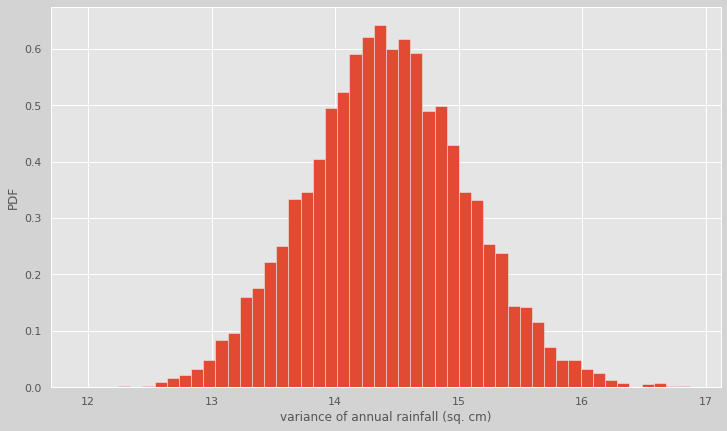

In [95]:
# Generate 10,000 bootstrap replicates of the variance: bs_replicates
bs_replicates = draw_bs_reps(rainfall, np.var, size=10000)

# Put the variance in units of square centimeters
bs_replicates = bs_replicates / 100

# Plot Style
plt.style.use('ggplot')

# Make a histogram of the results
plt.figure(figsize=(12, 7), facecolor='lightgray') 
_ = plt.hist(bs_replicates, density=True, bins=50)
_ = plt.xlabel('variance of annual rainfall (sq. cm)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

This is not **normally distributed**, **as it has a longer tail to the right**.

$\color{red}{\textbf{NOTE}}$ that we can also compute a **confidence interval** on the **variance**, **or any other statistic**, using `np.percentile()` with our **bootstrap replicates**.

### Confidence interval on the rate of no-hitters

A **Confidence Interval**, in statistics, refers to the ***probability that a population parameter will fall between a set of values*** for a certain proportion of times. They can take any number of probability limits, with the most common being a 95% or 99% confidence level.

<p align='center'>
    <a href='#'><img src='https://www.statisticshowto.com/wp-content/uploads/2009/10/ci-for-the-mean-formula.png' height=100 width-150>
    </a>
</p>


- CI	=	confidence interval
- $\bar{x}$	=	sample mean
- z	=	confidence level value
- ${s}$	=	sample standard deviation
- ${n}$	=	sample size

Consider again the inter-no-hitter intervals for the modern era of baseball. Generate $10,000$ bootstrap replicates of the optimal parameter $\tau$. Plot a histogram of your replicates and report a $95%$ confidence interval.

In [96]:
df_nohitter = pd.read_csv('mlb_nohitters.csv')
df_nohitter.head(3)

,date,game_number,winning_team,losing_team,winning_pitcher
0,18760715,140,NaN,NaN,NaN
1,18800612,1035,NaN,NaN,NaN
2,18800617,1046,NaN,NaN,NaN


__Instructions__

- Generate `10000` bootstrap replicates of $\tau$ from the `nohitter_times` data using your `draw_bs_reps()` function. Recall that the optimal $\tau$  is calculated as the mean of the data.

- Compute the 95% confidence interval using `np.percentile()` and passing in two arguments: The array `bs_replicates`, and the list of percentiles - in this case `2.5` and `97.5`.

- Print the confidence interval.

- Plot a histogram of your bootstrap replicates.

95% confidence interval = [ 89153.70544218 103782.70297619] games


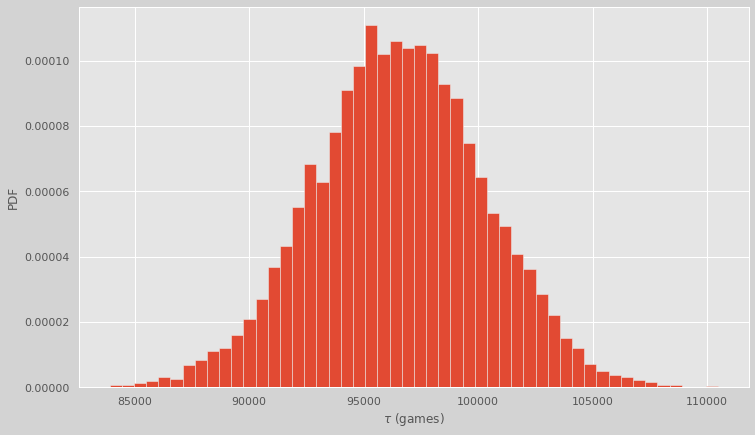

In [97]:
nohitter_times = np.array(df_nohitter.game_number)
# Draw bootstrap replicates of the mean no-hitter time (equal to tau): bs_replicates
bs_replicates = draw_bs_reps(nohitter_times, np.mean, size=10000)

# Compute the 95% confidence interval: conf_int
conf_int = np.percentile(bs_replicates, [2.5, 97.5])

# Print the confidence interval
print('95% confidence interval =', conf_int, 'games')

# Plot Style
plt.style.use('ggplot')

# Plot the histogram of the replicates
plt.figure(figsize=(12, 7), facecolor='lightgray') 
_ = plt.hist(bs_replicates, bins=50, density=True)
_ = plt.xlabel(r'$\tau$ (games)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()


__NOTE__


This gives us an estimate of what the typical **time** between **no-hitters** is. It could be anywhere between **660** and **870** games.

## __Pairs bootstrap__

We computed **bootstrap confidence intervals** on summary statistics i.e. we did not assume any model underlying the data; the **estimates were done using the data alone**.

**2008 US swing state election** results we were using a **linear model**, which has **two parameters**, the ***slope*** and ***intercept***. This was a parametric estimate. The optimal parameter values we compute for our parametric model.

__Let's consider the swing state election data from the prequel to this course. What if we had the election again, under identical conditions? How would the slope and intercept change?__

>There are several ways to get bootstrap estimates of the **confidence intervals** on these parameters, each of which makes __difference assumptions__ about the data.We will do a method that makes the least assumptions called __pairs bootstrap__.

__Pairs bootstrap for linear regression__

- __Resample__ data in pairs
- Compute __slope__ and __intercept__ from resampled data
- Each __slope__ and __intercept__ is a bootstrap replicate.
- Compute __confidence intervals(CI)__ from percentiles of bootstrap
replicates.


### A function to do pairs bootstrap

As discussed in the video, pairs bootstrap involves resampling pairs of data. Each collection of pairs fit with a line, in this case using `np.polyfit()`. We do this again and again, getting bootstrap replicates of the parameter values. To have a useful tool for doing pairs bootstrap, you will write a function to perform pairs bootstrap on a set of x,y data.

**Instructions**

- Define a function with call signature `draw_bs_pairs_linreg(x, y, size=1)` to perform pairs bootstrap estimates on linear regression parameters.

    - Use `np.arange()` to set up an array of indices going from 0 to `len(x)`. These are what you will resample and use them to pick values out of the `x` and `y` arrays.
    
    - Use `np.empty()` to initialize the slope and intercept replicate arrays to be of size `size`.

- Write a `for` loop to:
    
    - Resample the indices inds. Use np.`random.choice()` to do this.

    - Make new  and  arrays `bs_x` and `bs_y` using the the resampled indices `bs_inds`. To do this, slice `x` and `y` with `bs_inds`.

    - Use `np.polyfit()` on the new  and  arrays and store the **computed slope** and i**ntercept**.

- Return the pair bootstrap replicates of the slope and intercept.

DataSet: __female_literacy_fertility.csv__

In [98]:
def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x,bs_y,1)

    return bs_slope_reps, bs_intercept_reps

### Pairs bootstrap of literacy/fertility data

Using the function you just wrote, perform pairs bootstrap to plot a histogram describing the estimate of the slope from the illiteracy/fertility data. Also report the 95% confidence interval of the slope. The data is available to you in the NumPy arrays `illiteracy` and `fertility`.

As a reminder, `draw_bs_pairs_linreg()` has a function signature of `draw_bs_pairs_linreg(x, y, size=1)`, and it returns two values: `bs_slope_reps` and `bs_intercept_reps`.

__Instructions__

- Use your `draw_bs_pairs_linreg()` function to take `1000` bootstrap replicates of the slope and intercept. The x-axis data is `illiteracy` and y-axis data is `fertility`.

- Compute and print the 95% bootstrap confidence interval for the slope.

- Plot and show a histogram of the slope replicates.


In [99]:
df_literacy = pd.read_csv('female_literacy_fertility.csv')
df_literacy.columns

Index(['Country ', 'Continent', 'female literacy', 'fertility', 'population'], dtype='object')

In [100]:
literacy = df_literacy['female literacy']
fertility = df_literacy['fertility']

[-0.05533257 -0.04380632]


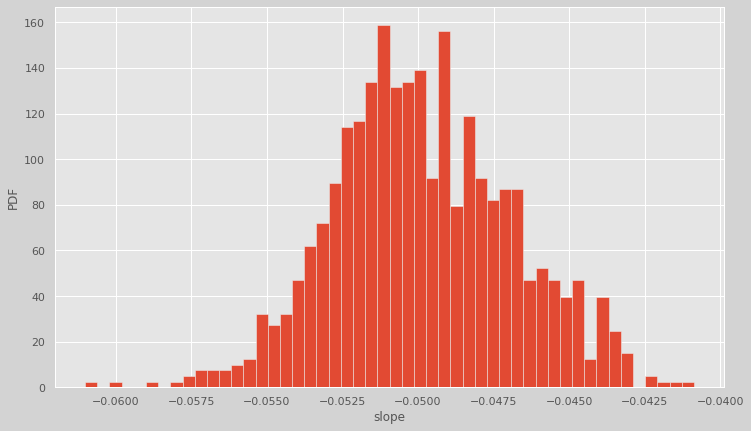

In [101]:
# Generate replicates of slope and intercept using pairs bootstrap
bs_slope_reps, bs_intercept_reps = draw_bs_pairs_linreg(literacy, fertility, size=1000)

# Compute and print 95% CI for slope
print(np.percentile(bs_slope_reps, [2.5,97.5]))

# Plot the histogram
plt.style.use('ggplot')
plt.figure(figsize=(12,7), facecolor='lightgrey')
_ = plt.hist(bs_slope_reps, bins=50, density=True)
_ = plt.xlabel('slope')
_ = plt.ylabel('PDF')
plt.show()

### Plotting bootstrap regressions

A nice way ***to visualize the variability*** we might expect in a linear regression is to plot the line we would get from each bootstrap replicate of the slope and intercept. Do this for the first 100 of our bootstrap replicates of the **slope** and **intercept** (stored as `bs_slope_reps` and `bs_intercept_reps`).

__Instructions__

- Generate an array of ${x}$-values consisting of `0` and `100` for the plot of the regression lines. Use the `np.array()` function for this.

- Write a `for` loop in which you plot a regression line with a slope and intercept given by the pairs bootstrap replicates. Do this for `100` lines.

    - When plotting the regression lines in each iteration of the for loop, recall the regression equation `y = a*x + b`. Here, `a` is `bs_slope_reps[i]` and `b` is `bs_intercept_reps[i]`.

    - Specify the keyword arguments `linewidth=0.5`, `alpha=0.2`, and `color='red'` in your call to `plt.plot()`.

- Make a scatter plot with illiteracy on the ${x}$-axis and fertility on the ${y}$-axis. Remember to specify the `marker='.'` and `linestyle='none'` keyword arguments.

- Label the axes, set a `2% margin`, and show the plot.

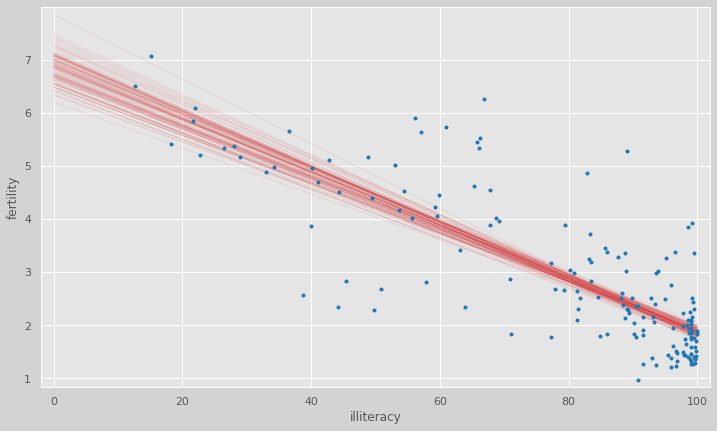

In [102]:
# Setting the style and plot size
plt.style.use('ggplot')
plt.figure(figsize=(12,7), facecolor='lightgrey')

# Generate array of x-values for bootstrap lines: x
x = np.array([0, 100])

# Plot the bootstrap lines
for i in range(100):
    _ = plt.plot(x, bs_slope_reps[i]*x + bs_intercept_reps[i],
                 linewidth=0.5, alpha=0.2, color='tab:red')

# Plot the data
_ = plt.plot(literacy, fertility, marker='.', linestyle='none',color='tab:blue')

# Label axes, set the margins, and show the plot
_ = plt.xlabel('illiteracy')
_ = plt.ylabel('fertility')
plt.margins(0.02)
plt.show()

<p align='center'> 
    <a href="https://twitter.com/F4izy"> 
        <img src="https://th.bing.com/th/id/OIP.FCKMemzqNplY37Jwi0Yk3AHaGl?w=233&h=207&c=7&o=5&pid=1.7" width=50px 
            height=50px> 
    </a> 
    <a href="https://www.linkedin.com/in/mohd-faizy/"> 
        <img src='https://th.bing.com/th/id/OIP.idrBN-LfvMIZl370Vb65SgHaHa?pid=Api&rs=1' width=50px height=50px> 
    </a> 
</p>